In [1]:
import pandas as pd

# Load the CSV files into pandas DataFrames
churn_data = pd.read_csv("Bank Customer Churn Prediction.csv")
customer_data = pd.read_csv("BankCustomerData.csv")

# Display the first few rows of each DataFrame
print("Churn Data:")
print(churn_data.head())

print("\nCustomer Data:")
print(customer_data.head())

# Function to print distinct values for categorical columns
def print_categorical_values(df, df_name):
    print(f"Distinct values for categorical columns in {df_name}:")
    for column in df.select_dtypes(include=['object', 'category']).columns:
        print(f"\nColumn: {column}")
        print(df[column].unique())

# Print distinct values for each dataset
print_categorical_values(churn_data, "Churn Data")
print_categorical_values(customer_data, "Customer Data")

Churn Data:
   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  

Customer Data:
   age           job  marital  education default  balance housing loan  \
0   58    management 

In [2]:
# Türkçeleştirme sözlükleri

job_map = {
    'admin.': 'büro görevlisi', 'blue-collar': 'vasıfsız işçi', 'entrepreneur': 'girişimci',
    'housemaid': 'temizlikçi', 'management': 'yönetici', 'retired': 'emekli',
    'self-employed': 'serbest meslek', 'services': 'hizmet sektörü', 'student': 'öğrenci',
    'technician': 'teknisyen', 'unemployed': 'işsiz', 'unknown': 'bilinmiyor'
}

marital_map = {
    'married': 'evli', 'single': 'bekar', 'divorced': 'boşanmış/ dul', 'unknown': 'bilinmiyor'
}

education_map = {
    'basic.4y': 'ilkokul 4 yıl', 'basic.6y': 'ilkokul 6 yıl', 'basic.9y': 'ilkokul 9 yıl',
    'high.school': 'lise', 'illiterate': 'okuma yazma bilmeyen', 
    'professional.course': 'meslek kursu', 'university.degree': 'üniversite', 
    'tertiary': 'üniversite', 'secondary': 'lise', 'primary': 'ilkokul',
    'unknown': 'bilinmiyor'
}

binary_map = {
    'yes': 'evet', 'no': 'hayır', 'unknown': 'bilinmiyor'
}

contact_map = {
    'cellular': 'cep telefonu', 'telephone': 'sabit telefon', 'unknown': 'bilinmiyor'
}

month_map = {
    'jan': 'ocak', 'feb': 'şubat', 'mar': 'mart', 'apr': 'nisan',
    'may': 'mayıs', 'jun': 'haziran', 'jul': 'temmuz', 'aug': 'ağustos',
    'sep': 'eylül', 'oct': 'ekim', 'nov': 'kasım', 'dec': 'aralık'
}

day_map = {
    'mon': 'pzt', 'tue': 'sal', 'wed': 'çar', 'thu': 'per', 'fri': 'cum'
}

poutcome_map = {
    'failure': 'başarısız', 'success': 'başarılı', 'nonexistent': 'yok', 'other': 'diğer', 'unknown': 'bilinmiyor'
}

gender_map = {
    'Male': 'Erkek', 'Female': 'Kadın'
}

country_map = {
    'France': 'Fransa', 'Spain': 'İspanya', 'Germany': 'Almanya'
}


In [3]:
# Uygulama - Customer Data
customer_data['job'] = customer_data['job'].map(job_map)
customer_data['marital'] = customer_data['marital'].map(marital_map)
customer_data['education'] = customer_data['education'].map(education_map)
customer_data['default'] = customer_data['default'].map(binary_map)
customer_data['housing'] = customer_data['housing'].map(binary_map)
customer_data['loan'] = customer_data['loan'].map(binary_map)
customer_data['contact'] = customer_data['contact'].map(contact_map)
customer_data['month'] = customer_data['month'].map(month_map)
customer_data['poutcome'] = customer_data['poutcome'].map(poutcome_map)
customer_data['term_deposit'] = customer_data['term_deposit'].map(binary_map)

# Uygulama - Churn Data
churn_data['gender'] = churn_data['gender'].map(gender_map)
churn_data['country'] = churn_data['country'].map(country_map)


In [4]:
# Display the first few rows of each DataFrame
print("Churn Data:")
print(churn_data.head())

print("\nCustomer Data:")
print(customer_data.head())

Churn Data:
   customer_id  credit_score  country gender  age  tenure    balance  \
0     15634602           619   Fransa  Kadın   42       2       0.00   
1     15647311           608  İspanya  Kadın   41       1   83807.86   
2     15619304           502   Fransa  Kadın   42       8  159660.80   
3     15701354           699   Fransa  Kadın   39       1       0.00   
4     15737888           850  İspanya  Kadın   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  

Customer Data:
   age            job marital   education default  balance housing   loan  \
0   58       yönet

In [5]:
# Churn Data sütun adlarını Türkçeleştirme
churn_data.rename(columns={
    'customer_id': 'musteri_id',
    'credit_score': 'kredi_notu',
    'country': 'ülke',
    'gender': 'cinsiyet',
    'age': 'yaş',
    'tenure': 'kıdem',
    'balance': 'bakiye',
    'products_number': 'ürün_sayısı',
    'credit_card': 'kredi_karti_var_mi',
    'active_member': 'aktif_müsteri_mi',
    'estimated_salary': 'tahmini_maas',
    'churn': 'musteri_kaybi'
}, inplace=True)

# Customer Data sütun adlarını Türkçeleştirme
customer_data.rename(columns={
    'age': 'yaş',
    'job': 'meslek',
    'marital': 'medeni_durum',
    'education': 'eğitim',
    'default': 'temerrüt',  # kredi temerrüt durumu
    'balance': 'bakiye',
    'housing': 'konut_kredisi',
    'loan': 'ihtiyaç_kredisi',
    'contact': 'iletişim_tipi',
    'day': 'gün',
    'month': 'ay',
    'duration': 'arama_süresi_sn',
    'campaign': 'kampanya_arama_sayısı',
    'pdays': 'önceki_görüşmeden_geçen_gün',
    'previous': 'önceki_aramalar',
    'poutcome': 'önceki_kampanya_sonuç',
    'term_deposit': 'vadeli_mevduat'
}, inplace=True)


In [6]:
# Display the first few rows of each DataFrame
print("Churn Data:")
print(churn_data.head())

print("\nCustomer Data:")
print(customer_data.head())

Churn Data:
   musteri_id  kredi_notu     ülke cinsiyet  yaş  kıdem     bakiye  \
0    15634602         619   Fransa    Kadın   42      2       0.00   
1    15647311         608  İspanya    Kadın   41      1   83807.86   
2    15619304         502   Fransa    Kadın   42      8  159660.80   
3    15701354         699   Fransa    Kadın   39      1       0.00   
4    15737888         850  İspanya    Kadın   43      2  125510.82   

   ürün_sayısı  kredi_karti_var_mi  aktif_müsteri_mi  tahmini_maas  \
0            1                   1                 1     101348.88   
1            1                   0                 1     112542.58   
2            3                   1                 0     113931.57   
3            2                   0                 0      93826.63   
4            1                   1                 1      79084.10   

   musteri_kaybi  
0              1  
1              0  
2              1  
3              0  
4              0  

Customer Data:
   yaş         m

In [7]:
# Binary sütunları dönüştürme
customer_data['temerrüt'] = customer_data['temerrüt'].map({'hayır': 0, 'evet': 1})
customer_data['konut_kredisi'] = customer_data['konut_kredisi'].map({'hayır': 0, 'evet': 1})
customer_data['ihtiyaç_kredisi'] = customer_data['ihtiyaç_kredisi'].map({'hayır': 0, 'evet': 1})
customer_data['iletişim_tipi'] = customer_data['iletişim_tipi'].map({'bilinmiyor': 0}).fillna(1)  # Bilinmiyor dışında her şey 1 yapılır
customer_data['vadeli_mevduat'] = customer_data['vadeli_mevduat'].map({'hayır': 0, 'evet': 1})


In [8]:
# Binary sütunları dönüştürme
churn_data['cinsiyet'] = churn_data['cinsiyet'].map({'Erkek': 0, 'Kadın': 1})


In [9]:
# Display the first few rows of each DataFrame
print("Churn Data:")
print(churn_data.head())

print("\nCustomer Data:")
print(customer_data.head())

Churn Data:
   musteri_id  kredi_notu     ülke  cinsiyet  yaş  kıdem     bakiye  \
0    15634602         619   Fransa         1   42      2       0.00   
1    15647311         608  İspanya         1   41      1   83807.86   
2    15619304         502   Fransa         1   42      8  159660.80   
3    15701354         699   Fransa         1   39      1       0.00   
4    15737888         850  İspanya         1   43      2  125510.82   

   ürün_sayısı  kredi_karti_var_mi  aktif_müsteri_mi  tahmini_maas  \
0            1                   1                 1     101348.88   
1            1                   0                 1     112542.58   
2            3                   1                 0     113931.57   
3            2                   0                 0      93826.63   
4            1                   1                 1      79084.10   

   musteri_kaybi  
0              1  
1              0  
2              1  
3              0  
4              0  

Customer Data:
   yaş    

In [10]:
print(customer_data.dtypes)

yaş                              int64
meslek                          object
medeni_durum                    object
eğitim                          object
temerrüt                         int64
bakiye                           int64
konut_kredisi                    int64
ihtiyaç_kredisi                  int64
iletişim_tipi                  float64
gün                              int64
ay                              object
arama_süresi_sn                  int64
kampanya_arama_sayısı            int64
önceki_görüşmeden_geçen_gün      int64
önceki_aramalar                  int64
önceki_kampanya_sonuç           object
vadeli_mevduat                   int64
dtype: object


In [11]:
# Save the processed DataFrames to CSV files
churn_data.to_csv("Processed_Churn_Data.csv", index=False, encoding='utf-8')
customer_data.to_csv("Processed_Customer_Data.csv", index=False, encoding='utf-8')

# Confirm the files are saved
print("Processed Churn Data saved as 'Processed_Churn_Data.csv'")
print("Processed Customer Data saved as 'Processed_Customer_Data.csv'")

Processed Churn Data saved as 'Processed_Churn_Data.csv'
Processed Customer Data saved as 'Processed_Customer_Data.csv'


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt

# Veriyi yükleyelim
df = churn_data

# Kategorik değişkenleri sayısal hale getirme (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=['ülke', 'cinsiyet'], drop_first=True)

# Hedef değişken (Churn) ve özelliklerin ayrılması
X = df_encoded.drop(columns=['musteri_id', 'musteri_kaybi'])  # Tüm sütunları al, churn hariç ve müşteri_id hariç
y = df_encoded['musteri_kaybi']  # Hedef değişken (Churn)

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi normalizasyon (özellikleri aynı ölçekte olacak şekilde)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
# Random Forest Modelini Eğitme
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Test verisi ile tahmin yapma
y_pred_rf = rf_model.predict(X_test_scaled)

# Model değerlendirme metrikleri
print("Random Forest Model Doğruluğu:", accuracy_score(y_test, y_pred_rf))
print("Random Forest ROC AUC Skoru:", roc_auc_score(y_test, y_pred_rf))
print("\nRandom Forest Sınıflandırma Raporu:\n", classification_report(y_test, y_pred_rf))

# Feature Importances (Özelliklerin Modeldeki Önemi)
feature_importances = rf_model.feature_importances_

# Özelliklerin sıralanmış hali
features = X.columns
feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nÖzelliklerin Önem Sıralaması (Random Forest):")
print(feature_df)


Random Forest Model Doğruluğu: 0.8675
Random Forest ROC AUC Skoru: 0.7176340469732452

Random Forest Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000


Özelliklerin Önem Sıralaması (Random Forest):
               Feature  Importance
1                  yaş    0.237196
7         tahmini_maas    0.147350
0           kredi_notu    0.143695
3               bakiye    0.139023
4          ürün_sayısı    0.132449
2                kıdem    0.082883
6     aktif_müsteri_mi    0.041670
8          ülke_Fransa    0.019566
5   kredi_karti_var_mi    0.019336
10          cinsiyet_1    0.019235
9         ülke_İspanya    0.017597


In [14]:
# Logistic Regression Modelini Eğitme
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Test verisi ile tahmin yapma
y_pred_lr = lr_model.predict(X_test_scaled)

# Model değerlendirme metrikleri
print("\nLogistic Regression Model Doğruluğu:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression ROC AUC Skoru:", roc_auc_score(y_test, y_pred_lr))
print("\nLogistic Regression Sınıflandırma Raporu:\n", classification_report(y_test, y_pred_lr))



Logistic Regression Model Doğruluğu: 0.811
Logistic Regression ROC AUC Skoru: 0.5805960247074267

Logistic Regression Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



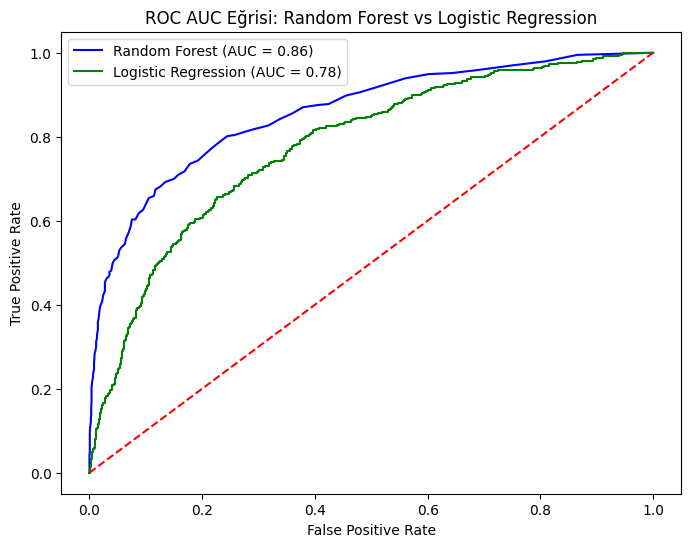

In [15]:
from sklearn.metrics import roc_curve

# Random Forest için ROC AUC
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)

# Logistic Regression için ROC AUC
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)

# ROC AUC Grafiği
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})')
plt.plot(fpr_lr, tpr_lr, color='green', label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_lr):.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Eğrisi: Random Forest vs Logistic Regression')
plt.legend()
plt.show()


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import joblib
import os

# 📦 Klasör oluştur
output_dir = "churn_model_outputs"
os.makedirs(output_dir, exist_ok=True)

# # 📊 Veri Yükleme
# churn_data = pd.read_csv("Churn_Data.csv")

# drop the column ülke
churn_data.drop(columns=["ülke" , "cinsiyet"], inplace=True)

# One-Hot Encoding
# df = pd.get_dummies(churn_data, columns=["ülke"], drop_first=True)

# 🎯 Bağımlı ve bağımsız değişkenleri ayır
X = df.drop(columns=["musteri_id", "musteri_kaybi"])
y = df["musteri_kaybi"]

print(df.columns)
# 🧪 Eğitim/test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔧 Standardizasyon
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔁 Model 1: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# 💡 Model 2: Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# 📄 Değerlendirme Raporu
rf_report = classification_report(y_test, y_pred_rf)
lr_report = classification_report(y_test, y_pred_lr)

rf_acc = accuracy_score(y_test, y_pred_rf)
lr_acc = accuracy_score(y_test, y_pred_lr)
rf_auc = roc_auc_score(y_test, y_prob_rf)
lr_auc = roc_auc_score(y_test, y_prob_lr)

# 📁 Raporları kaydet
with open(os.path.join(output_dir, "model_report.txt"), "w", encoding="utf-8") as f:
    f.write("🔎 Random Forest Report:\n")
    f.write(f"Accuracy: {rf_acc:.4f}\nAUC: {rf_auc:.4f}\n")
    f.write(rf_report + "\n\n")

    f.write("🔍 Logistic Regression Report:\n")
    f.write(f"Accuracy: {lr_acc:.4f}\nAUC: {lr_auc:.4f}\n")
    f.write(lr_report)

# 🧠 Modelleri Kaydet
joblib.dump(rf_model, os.path.join(output_dir, "random_forest_model.pkl"))
joblib.dump(lr_model, os.path.join(output_dir, "logistic_regression_model.pkl"))
joblib.dump(scaler, os.path.join(output_dir, "scaler.pkl"))  # Skaler'ı da kaydediyoruz

# 📈 ROC AUC Görseli
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.2f})', color='blue')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {lr_auc:.2f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Eğrisi')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "roc_auc_plot.png"))
plt.close()


Index(['musteri_id', 'kredi_notu', 'yaş', 'kıdem', 'bakiye', 'ürün_sayısı',
       'kredi_karti_var_mi', 'aktif_müsteri_mi', 'tahmini_maas',
       'musteri_kaybi'],
      dtype='object')
